In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import json
import isodate
from apiclient.discovery import build
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV

In [3]:
df = pd.read_csv('MarquesBrownlee_cleaned.csv')

In [5]:
# df.drop(columns = ['season_0.1','season_1.1','season_3.1','day_part_0.1','day_part_1.1' ,'day_part_3.1', 'Unnamed: 0'], inplace = True)

In [6]:
X = df.drop(columns = ['view_count'])
y = df['view_count']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 22 columns):
Unnamed: 0               1116 non-null int64
comment_count            1116 non-null int64
dislike_count            1116 non-null int64
duration                 1116 non-null int64
like_count               1116 non-null int64
live                     1116 non-null int64
publish_month            1116 non-null int64
publish_date             1116 non-null object
days_after_last_video    1116 non-null int64
title_length             1116 non-null int64
description_length       1116 non-null int64
tag_count                1116 non-null int64
season_fall              1116 non-null int64
season_summer            1116 non-null int64
season_winter            1116 non-null int64
day_part_afternoon       1116 non-null int64
day_part_evening         1116 non-null int64
day_part_overnight       1116 non-null int64
review                   1116 non-null int64
apple                    1116 non-nul

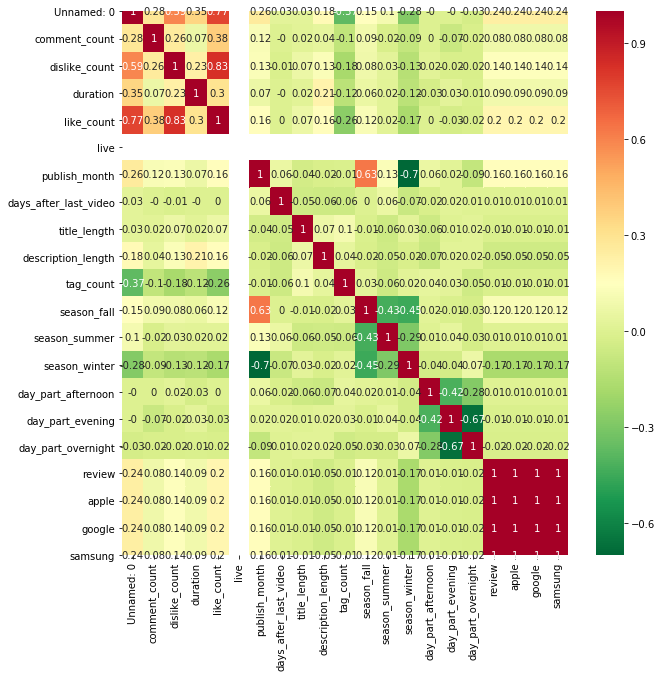

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(round(X.corr(), 2), cmap = 'RdYlGn_r', annot = True)

In [12]:
pd.DataFrame(round(df.corr()['view_count'], 40)).sort_values(by='view_count', ascending=False)

,view_count
view_count,1.000000
like_count,0.854842
dislike_count,0.774084
Unnamed: 0,0.643631
review,0.293713
google,0.293713
apple,0.293713
samsung,0.293713
comment_count,0.265318
duration,0.259642


In [23]:
X['like_dislike_ratio'] = X['like_count'] / (X['dislike_count'] + X['like_count'])

In [24]:
X.drop(columns = ['like_count','dislike_count'], inplace = True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [112]:
X_train

,comment_count,duration,days_after_last_video,title_length,description_length,tag_count,weekend,season_0,season_1,season_3,day_part_0,day_part_1,day_part_3,review,apple,google,samsung,tesla,like_dislike_ratio
59,10,195,0,52,178,14,1,0,0,1,0,0,1,0,0,0,0,0,0.914286
13,16,140,0,24,33,6,0,0,0,1,0,0,1,0,0,0,0,0,0.977273
649,5355,1022,3,22,495,18,0,1,0,0,0,1,0,1,0,1,0,0,0.985950
262,59,228,3,42,324,28,0,1,0,0,0,0,1,0,0,0,0,0,0.867769
828,1873,393,2,27,541,9,0,0,0,1,0,0,1,0,0,0,0,0,0.987438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,5680,548,3,29,441,14,0,1,0,0,0,0,1,1,0,0,1,0,0.973699
905,11719,1061,6,43,533,17,0,1,0,0,0,0,1,1,0,1,0,0,0.967256
1096,4173,458,1,46,605,29,0,1,0,0,0,1,0,1,1,0,0,0,0.976709
235,34,208,3,37,112,20,0,0,0,0,0,1,0,0,0,0,0,0,0.899254


In [51]:
X_train_numerical = X_train.drop(columns = ['weekend',
'season_0',
'season_1',        
'season_3',       
'day_part_0',     
'day_part_1',     
'day_part_3',    
'review',   
'apple',  
'google' , 
'samsung',
'tesla'])

X_test_numerical = X_test.drop(columns = ['weekend',
'season_0',
'season_1',        
'season_3',       
'day_part_0',     
'day_part_1',     
'day_part_3',    
'review',   
'apple',  
'google' , 
'samsung',
'tesla'])

X_train_categorical = X_train[['weekend',
'season_0',
'season_1',        
'season_3',       
'day_part_0',     
'day_part_1',     
'day_part_3',    
'review',   
'apple',  
'google' , 
'samsung',
'tesla']]

X_test_categorical = X_test[['weekend',
'season_0',
'season_1',        
'season_3',       
'day_part_0',     
'day_part_1',     
'day_part_3',    
'review',   
'apple',  
'google' , 
'samsung',
'tesla']]


In [69]:
scaler = MinMaxScaler()
X_train_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns = X_train_numerical.columns, index = X_train_numerical.index)
X_test_numerical_scaled = pd.DataFrame(scaler.transform(X_test_numerical), columns = X_test_numerical.columns,index = X_test_numerical.index )

In [71]:
X_train_scaled = pd.concat([X_train_numerical_scaled, X_train_categorical], axis = 1)
X_test_scaled = pd.concat([X_test_numerical_scaled, X_test_categorical], axis = 1)

In [72]:
linreg = LinearRegression()
model = linreg.fit(X_train_scaled, y_train)

In [98]:
def train_vs_test(model, X_train, X_test, y_train, y_test):
    
    r_2_train = np.mean(cross_val_score(model, X_train, y_train, cv = 5 ))
    
    y_test_hat = model.predict(X_test)
    r_2_test = r2_score(y_test, y_test_hat)
    
    return print(('The R^2 for the train set is {} \nThe R^2 for the test set is {} '.format(round(r_2_train, 4), round( r_2_test, 4))))
    

In [99]:
train_vs_test(model, X_train_scaled, X_test_scaled, y_train, y_test)

The R^2 for the train set is 0.3401 
The R^2 for the test set is -0.6796 


In [102]:
print(list(zip(X.columns, model.coef_)))

[('comment_count', 6456926.905826063), ('duration', 6794499.293402263), ('days_after_last_video', -454361.3414868727), ('title_length', 244486.0438156195), ('description_length', 1026335.8804083844), ('tag_count', -1569923.2055992186), ('weekend', 95984.5349365838), ('season_0', -9137.58962243406), ('season_1', -8069.718614895394), ('season_3', -226857.50125202563), ('day_part_0', -292941.9560140406), ('day_part_1', 81970.22017289182), ('day_part_3', -42109.98722698258), ('review', 61750.689123111006), ('apple', 688204.2757291639), ('google', 1267364.6528808435), ('samsung', 121750.14165283927), ('tesla', 795983.6093001032), ('like_dislike_ratio', 1016551.0359004624)]


In [105]:
from itertools import combinations
combinations = list(combinations(X.columns, 2))

interactions = []
data = X_train_scaled.copy()
for comb in combinations:
    data["interaction"] = data[comb[0]] * data[comb[1]]
    score = round(np.mean(cross_val_score(linreg, data, y_train, scoring="r2", cv=5)), 4)
    if score > 0.3401: interactions.append((comb[0], comb[1], round(score,3)))
            
print("Top 7 interactions: %s" %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

Top 7 interactions: [('comment_count', 'like_dislike_ratio', 0.479), ('comment_count', 'day_part_3', 0.421), ('comment_count', 'samsung', 0.413), ('comment_count', 'duration', 0.408), ('comment_count', 'season_1', 0.406), ('comment_count', 'weekend', 0.405), ('comment_count', 'day_part_0', 0.4)]


In [114]:
rfe = RFECV(linreg, cv = 5)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)
lm = linreg.fit(X_train_rfe, y_train)

In [115]:
train_vs_test(lm, X_train_rfe, X_test_rfe, y_train, y_test)

The R^2 for the train set is 0.3455 
The R^2 for the test set is -0.7355 
